# Sentimental Analysis on Restaurant reviews using SVM 

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

### Importing dataset

In [2]:
df = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t', quoting=3)
print(df)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


### Pre-processing

In [3]:
import re # regular expression
import nltk #natural language tool kit
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = [] # to collect all the refined reviews
for i in range(0,1000):
    review = re.sub('[^a-zA-Z]', ' ',df['Review'][i]) # substituing all the none characters by space
    review = review.lower() # converting all the reviews in to lower case
    review = review.split() # converting the senetence into a list of words
    # to apply the stemming we first need to create the object of the porterStemmer class
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english') # collecting all the english stopwords
    all_stopwords.remove('not')
    all_stopwords.remove("but")
    all_stopwords.remove('no')
    all_stopwords.remove("didn")
    all_stopwords.remove("doesn")
    all_stopwords.remove("wasn")
    all_stopwords.remove("is")
    all_stopwords.remove("won")
    all_stopwords.remove("she")
    all_stopwords.remove("he") 
    all_stopwords.append("get")
    all_stopwords.append("styrofoam")
    all_stopwords.remove("don't")
    all_stopwords.append("scallop")
    all_stopwords.append("downtown")
    all_stopwords.append("attack")
    all_stopwords.append("underwhelm")
    all_stopwords.append("flirt")
    all_stopwords.append("in")
    all_stopwords.remove("won't")
    all_stopwords.append("marrow")
    #removed some words from stopwords list
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    # to convert the list of words into sentence we use the join function
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Creating Bag Of Words model

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = df.iloc[:,-1].values
len(x[0])
# we can reduce the number of columns/features in x by using the max_feature argument of the CountVectorizer

1500

### Splitting training and testing dataset 

In [5]:
# splitting the x and y into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.05, random_state=0)

### Applying SVM

In [6]:
from sklearn.svm import SVC
SVM_classifier = SVC(kernel='linear', random_state=0)
SVM_classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [7]:
# predicting the classification for the test data
y_pred = SVM_classifier.predict(x_test)

### Plotting Confusion Matrix

Accuracy score is:  0.94
[[25  3]
 [ 0 22]]


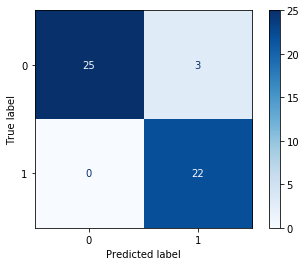

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
acc = accuracy_score(y_test,y_pred)
print("Accuracy score is: ",acc)
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(estimator=SVM_classifier, X=x_test, y_true=y_test, cmap='Blues')

### Classification output

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.88      1.00      0.94        22

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



### User input

In [10]:
review2=input()
corpus2=[]
review2 = re.sub('[^a-zA-Z]', ' ',review2)
review2= review2.lower().split()
review2 = [ps.stem(r) for r in review2 if not r in set(all_stopwords)]
review2 = ' '.join(review2)
corpus2.append(review2)


x2 = cv.fit_transform(corpus+corpus2).toarray()
liked=x2[-1].reshape(1,-1)
result=SVM_classifier.predict(liked)
if result==1:
    out="Positive"
else:
    out="Negative"
print(out)


Good food, great ambiance!
Positive
